Having a set of data pairs (*x, y*), where *y* shows linear dependence on *x*, the line of best fit can be found with 
[simple linear regression]({% link _posts\handbook\statistics\2020-09-16-simple-linear-regression.md %}) model. In this post, I present Pyhton code solving the problem of simple linear regression.
<!--more-->
First, let's import stuff. Numpy for arangement and easy processing of numerical data, Matplotlib for visualization, and in the and stats modul from Scipy to test if implemented solution works properly.

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

Now, we can arrange an array of independent variable *X*, and calculate values of dependent variable *Y*, assuming some linear dependence. We don't want to get straght line, so a bit of noise is introduced onto *Y*.

In [22]:
X = np.arange(0, 100)
noise = 20 * np.random.normal(size=100)
Y = (3*X+14) + noise

Time to see what we've got.

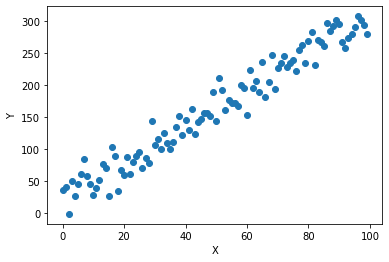

In [23]:
plt.scatter(X, Y)
plt.xlabel('X')
_ = plt.ylabel('Y')

Looks fine. There is clearly linear dependence, however points don't create straight line (due to introduced noise).

The slope for the line of best fit is given with equation

![a](/assets/images/handbook/statistics/simple_linear_regression_a.gif)

Below function will calculate the value of *a*.

In [4]:
def get_slope(x, y):
    n = len(x)
    xy = x * y
    xx = x * x
    
    sum_x = x.sum()
    sum_y = y.sum()
    sum_xy = xy.sum()
    sum_xx = xx.sum()
    sum_x_sq = sum_x * sum_x
    
    a_output = (n * sum_xy - sum_x * sum_y) / (n * sum_xx - sum_x_sq)
    
    return a_output

In [5]:
def get_intercept(x, y, slope):
    return y.mean() - slope * x.mean()

In [20]:
def get_residual_sum_of_squares(y, y_fit):
    squares = (y - y_fit) ** 2
    return squares.sum()

def get_total_sum_of_squares(y):
    squares = (y - y.mean()) ** 2
    return squares.sum()

def get_r_squared(y, y_fit):
    ss_res = get_residual_sum_of_squares(y, y_fit)
    ss_tot = get_total_sum_of_squares(y)
    return (1 - ss_res / ss_tot)

In [7]:
def linear_regression(x, y):
    slope = get_slope(x, y)
    intercept = get_intercept(x, y, slope)
    y_fit = slope * x + intercept
    r_squared = get_r_squared(y, y_fit)
    
    summary = {'Slope': slope, 
               'Intercept': intercept,
               'R-squared': r_squared}
    
    return summary, (x, y_fit)

In [8]:
summary, fit = linear_regression(X, Y)
summary

{'Slope': 2.972015968329616,
 'Intercept': 15.527217136163529,
 'R-squared': 0.9576339721542324}

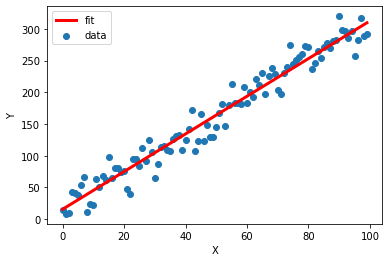

In [19]:
plt.scatter(X, Y)
plt.plot(fit[0], fit[1], c='r', linewidth=3)
plt.legend(['fit', 'data'])
plt.xlabel('X')
_ = plt.ylabel('Y')

In [14]:
slope, intercept, r_value, *_ = stats.linregress(X, Y)